In [33]:
#imported here ninja weopons, careful!!!!!
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.datasets as datasets
import scipy.stats as stats
from ipywidgets import *
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')
%matplotlib inline

In [198]:
df=pd.read_csv('df_con')
df.head()

,scores,0,1,2,3,4,5,6,7,8,...,1920.1,1921.1,1922.1,1923.1,1924.1,1925.1,1926.1,1927.1,1928.1,1929.1
0,18614,-0.035533,-0.055721,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.076278,-0.064971,...,-0.020507,-0.020507,-0.029007,-0.020507,-0.029007,-0.020507,-0.020507,-0.020507,-0.029007,-0.020507
1,43404,-0.035533,-0.055721,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.076278,-0.064971,...,-0.020507,-0.020507,-0.029007,-0.020507,-0.029007,-0.020507,-0.020507,-0.020507,-0.029007,-0.020507
2,34571,-0.035533,-0.055721,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.076278,-0.064971,...,-0.020507,-0.020507,-0.029007,-0.020507,-0.029007,-0.020507,-0.020507,-0.020507,-0.029007,-0.020507
3,47738,-0.035533,-0.055721,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.076278,-0.064971,...,-0.020507,-0.020507,-0.029007,-0.020507,-0.029007,-0.020507,-0.020507,-0.020507,-0.029007,-0.020507
4,14637,-0.035533,-0.055721,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.076278,-0.064971,...,-0.020507,-0.020507,-0.029007,-0.020507,-0.029007,-0.020507,-0.020507,-0.020507,-0.029007,-0.020507


In [199]:
X=df
X.shape

(2379, 8667)

In [200]:
y=pd.read_csv('target')
y.shape

(2379, 1)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# RandomForest: target vs [subreddits, score, titles]

In [202]:
rf=RandomForestClassifier(n_jobs=2, random_state=0)
rf.fit(X_train, y_train)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [203]:
rf.score(X_train, y_train)

0.965473948524796

In [204]:
rf.score(X_test, y_test)

0.7544529262086515

In [197]:
y_pred=rf.predict(X_test)

In [1]:
rf=RandomForestClassifier(n_jobs=-1)

param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
}
gs=GridSearchCV(rf, param_grid=param_grid)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [211]:
gs.score(X_test, y_test)

0.7582697201017812

In [212]:
y_pred=gs.predict(X_test)

In [213]:
# create dataframe of matrix and add to variable conmat
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])



confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),332,64
is_Low(0),126,264


In [134]:
#Tells us the probablity of a Reddit will be correctly identified in the class its assigned
clf_y_score = rf.predict_proba(X_test)[:, 1] #[:,1] is formatting the output
clf_y_score

array([0.8, 0.1, 0. , 0.2, 0.8, 0.1, 0. , 0.3, 0.7, 1. , 0. , 0. , 0.4,
       0. , 0.4, 0.8, 0.7, 0.2, 0. , 0.1, 0.2, 0.4, 0.3, 0.7, 0. , 0.3,
       0.4, 0. , 0. , 0. , 0. , 1. , 0.2, 0.7, 0. , 1. , 1. , 1. , 0.7,
       0. , 0.3, 0.1, 0.5, 0. , 0. , 0. , 0. , 1. , 0.4, 0.1, 0.2, 1. ,
       0. , 0. , 0.7, 1. , 0. , 0. , 0.4, 0.8, 0.7, 0. , 0. , 0. , 1. ,
       0.7, 0.1, 0. , 0.5, 0. , 0.6, 1. , 0.6, 0. , 0. , 0.6, 1. , 0.1,
       0. , 0.6, 0.8, 0.6, 0.1, 1. , 0. , 0.9, 0. , 0.5, 0.2, 0. , 0. ,
       0.8, 0.7, 0.9, 0.7, 0.7, 0.2, 0.1, 0.6, 0.7, 0.1, 0.1, 0.1, 0.2,
       0.3, 0.3, 0. , 0.4, 0.6, 0.8, 0.2, 0.8, 0. , 0.4, 0.2, 0.9, 0.2,
       1. , 1. , 1. , 1. , 0.2, 1. , 0.7, 0.2, 0. , 1. , 0.1, 0.9, 0.4,
       0.1, 0. , 0.2, 0. , 0. , 0.1, 1. , 0.9, 0. , 0.2, 0.5, 0.4, 0.2,
       0.3, 0.6, 0.6, 0. , 0.6, 0. , 0. , 0.6, 0. , 0.9, 0.9, 1. , 0.9,
       1. , 0.8, 0. , 0.6, 0. , 0. , 1. , 0.4, 0.1, 0.7, 0. , 0. , 0.5,
       0.9, 0.2, 0.1, 1. , 0.6, 0.8, 0.2, 0.9, 0.9, 0. , 0.2, 0.

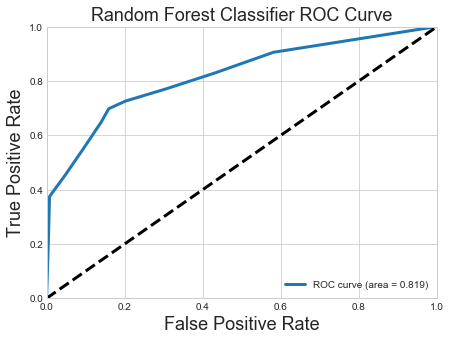

In [136]:
clf_FPR = dict()
clf_TPR = dict()
clf_ROC_AUC = dict()

clf_FPR[1], clf_TPR[1], _ = roc_curve(y_test, clf_y_score)
clf_ROC_AUC[1] = auc(clf_FPR[1], clf_TPR[1])

plt.figure(figsize=[7,5])
plt.plot(clf_FPR[1], clf_TPR[1], label='ROC curve (area = %0.3f)' % clf_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [214]:
rf_n=RandomForestClassifier(n_jobs=-1, n_estimators=54, max_depth=30)
rf_n.fit(X_train, y_train)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [215]:
print(rf_n.score(X_train, y_train),rf_n.score(X_test, y_test))

0.8173258003766478 0.7544529262086515


In [216]:
# create dataframe of matrix and add to variable conmat
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])



confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),332,64
is_Low(0),126,264


In [217]:

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=41)

dt = RandomForestClassifier(min_samples_leaf=5)
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print( s.mean().round(3), s.std().round(3))

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.654 0.109


# RandomForest: target vs [ score, titles]

In [43]:
df=pd.read_csv('original')

In [45]:

X=df.scores
y=df.target
X.shape

(2379,)

In [127]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train),rf.score(X_test, y_test))

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.965473948524796 0.7544529262086515


# RandomForest: target vs title

In [47]:
df=pd.read_csv('just_title')

X=df
y=df.target

In [218]:
rf=RandomForestClassifier(n_estimators=35, max_depth=40)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train),rf.score(X_test, y_test))

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8254865034526051 0.7709923664122137


In [219]:
y_train.mean()

target    0.509102
dtype: float64

In [220]:
y_pred=rf.predict(X_test)

In [221]:
# create dataframe of matrix and add to variable conmat
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                                              columns=['predicted_High(1)', 'predicted_low(0)'], 
                      index=['is_High(1)', 'is_Low(0)'])

In [222]:
confusion_mat

,predicted_High(1),predicted_low(0)
is_High(1),339,57
is_Low(0),123,267


In [223]:
print("\nClassification Report:\n",classification_report(y_test, y_pred))
# recall is sensetivity, shows confusion matrix scoring


Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.86      0.79       396
          1       0.82      0.68      0.75       390

avg / total       0.78      0.77      0.77       786



In [112]:




                    # try data enginering agian. Differen approach





In [234]:
df=pd.read_csv('original')

In [235]:
df.columns

Index(['index', 'subreddits', 'num_comments', 'titles', 'scores',
       'created_utc', 'timelength', 'target'],
      dtype='object')

In [236]:
#function to remove and punctuation from the text entered
def remove_punctuation(text):
    lower = text.lower()   #makes all text lowercase
    exclude = set(string.punctuation)    #can tell it to exclude punctuation marks. See above library link
    return "".join(ch for ch in lower if ch not in exclude)  #will return the string of text if the character for each character in lower and is not in the excluded puncuation

In [237]:
# remove punctuation from the title series with the remove_punctuation function
df['titles'] = df['titles'].apply(remove_punctuation)

In [238]:

# Stemming function is used to simplify the text to its more basic root# Stemming 
stemmer = PorterStemmer()
def stems(string):
    string = string.split(' ')
    temp = ""
    for i in string:
        temp += (stemmer.stem(i) + " ")
    return temp

In [239]:
# Stem function applied to titles
df['titles'] = df['titles'].apply(stems)

In [240]:
# Vectorize
cvec = CountVectorizer(stop_words='english')
 

X  = pd.DataFrame(cvec.fit_transform(df['titles']).todense(),
             columns=cvec.get_feature_names())

In [241]:
y=df.target

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [243]:
rf=RandomForestClassifier(n_estimators=35, max_depth=40)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train),rf.score(X_test, y_test))

0.8234234234234235 0.5518207282913166


In [161]:
df.titles.head()

0                          millionair meet billionair 
1    abc cancel roseann barr sitcom after her tweet...
2    ‘roseanne’ cancel abc scrap season 11 after ba...
3    north face stole my photo and put it on their ...
4                                cosplay starter pack 
Name: titles, dtype: object

In [162]:
# another approach. 

In [177]:
df=pd.read_csv('title_no_scaler')

In [182]:
df.shape

(2379, 6736)

In [185]:
df=df.drop('target', axis=1)

In [186]:
# Vectorize
cvec = CountVectorizer(stop_words='english')

In [187]:
X  = pd.DataFrame(cvec.fit_transform(df).todense(),
             columns=cvec.get_feature_names())

In [188]:
X.shape

(6735, 6735)

In [174]:
y=pd.read_csv('target')


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ValueError: Found input variables with inconsistent numbers of samples: [6735, 2379]

In [145]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train),rf.score(X_test, y_test))

1.0 0.9985994397759104


# RandomForest: target vs subreddit

In [88]:
df=pd.read_csv('original')

In [94]:
df.head()

,index,subreddits,num_comments,titles,scores,created_utc,timelength,target
0,0,gifs,1137,Millionaire meets billionaire,18614,1.527624e+09,21.546944,1
1,1,news,5877,ABC cancels Roseanne Barr's sitcom after her t...,43404,1.527616e+09,19.441944,1
2,2,television,10083,‘Roseanne’ Cancelled: ABC Scraps Season 11 Aft...,34571,1.527616e+09,19.373056,1
3,3,mildlyinfuriating,2525,North Face stole my photo and put it on their ...,47738,1.527614e+09,18.789444,1
4,4,starterpacks,643,Cosplay Starter Pack,14637,1.527616e+09,19.463056,1


In [89]:
# Vectorize
cvec = CountVectorizer(stop_words='english')
 

X  = pd.DataFrame(cvec.fit_transform(df['subreddits']).todense(),
             columns=cvec.get_feature_names())

In [90]:
y=df.target

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [92]:
rf_n.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
print(rf_n.score(X_train, y_train),rf_n.score(X_test, y_test))

0.9267267267267267 0.5266106442577031


In [ ]:
from nltk.corpus import 

In [140]:
df.head()

,00,000,00am,01m,03,07,09,10,100,100k,...,zhongwei,zijn,zofia,zonable,zoo,zoomies,zoro,zorro,zr,ztd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
